In [1]:
import numpy as np 


In [2]:
import pandas as pd 


In [3]:
from keras.preprocessing.image import ImageDataGenerator, load_img


Using TensorFlow backend.


In [4]:
from keras.utils import to_categorical


In [5]:
from sklearn.model_selection import train_test_split


In [6]:
import matplotlib.pyplot as plt
import random

In [7]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [12]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [15]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [16]:
earlystop = EarlyStopping(patience=10)

In [17]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [18]:
callbacks = [earlystop, learning_rate_reduction]

In [19]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
x_train = train_datagen.flow_from_directory(r'C:\Users\Meghana\Desktop\Birdspecies\traindata',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                     class_mode = 'categorical')

Found 455 images belonging to 4 classes.


In [22]:
x_test = test_datagen.flow_from_directory(r'C:\Users\Meghana\Desktop\Birdspecies\testdata',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 126 images belonging to 4 classes.


In [23]:
print(x_train.class_indices)

{'001.Black_footed_Albatross': 0, '004.Groove_billed_Ani': 1, '009.Brewer_Blackbird': 2, '189.Red_bellied_Woodpecker': 3}


In [24]:
model.fit_generator(x_train,
                         steps_per_epoch =130 ,
                         epochs = 10,
                         validation_data = x_test,
                         validation_steps = 20,callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
130/130 [==============================] - 179s 1s/step - loss: 1.2060 - acc: 0.6327 - val_loss: 0.7393 - val_acc: 0.7778
Epoch 2/10
130/130 [==============================] - 141s 1s/step - loss: 0.7117 - acc: 0.7583 - val_loss: 1.1534 - val_acc: 0.5556
Epoch 3/10
130/130 [==============================] - 143s 1s/step - loss: 0.4939 - acc: 0.8233 - val_loss: 1.6006 - val_acc: 0.6587

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/10
130/130 [==============================] - 151s 1s/step - loss: 0.2980 - acc: 0.8847 - val_loss: 0.2765 - val_acc: 0.8968
Epoch 5/10
130/130 [==============================] - 145s 1s/step - loss: 0.2310 - acc: 0.9135 - val_loss: 0.2613 - val_acc: 0.8968
Epoch 6/10
130/130 [==============================] - 144s 1s/step - loss: 0.2074 - acc: 0.9181 - val_loss: 0.5438 - val_acc: 0.7619

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0002500000118

In [57]:
model.save("mybirds.h5")

In [58]:
from keras.models import load_model

In [59]:
from keras.models import load_model
import numpy as np
import cv2
model= load_model('mybirds.h5')          

In [60]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
from skimage.transform import resize
def detect(frame):
    
    img = resize(frame,(128,128))
    img=np.expand_dims(img,axis=0)
    if(np.max(img)>1):
        
        img= img/255.0
    prediction = model.predict(img)
    print(prediction)
    prediction_class= model.predict_classes(img)
    print(prediction_class)

In [62]:
from matplotlib.pyplot import *

[[4.2872911e-04 6.2281222e-05 1.6148034e-03 9.9789423e-01]]
[3]


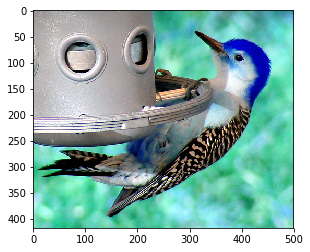

In [69]:
frame=cv2.imread(r"C:\Users\Meghana\Desktop\Birdspecies\testdata\189.Red_bellied_Woodpecker\Red_Bellied_Woodpecker_0079_181010.jpg")
data=detect(frame)
imshow(frame)

[[0.02709334 0.00252943 0.83866537 0.1317118 ]]
[2]


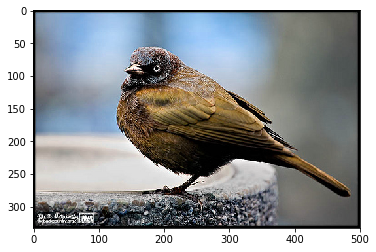

In [72]:
frame=cv2.imread(r"C:\Users\Meghana\Desktop\Birdspecies\testdata\009.Brewer_Blackbird\Brewer_Blackbird_0011_2586016547.jpg")
data=detect(frame)
imshow(frame)